# TP1 : Approches collaboratives : utilisateur-utilisateur, item-item, et agglomérative

Lamia Salhi - 2164386
Théo Delbecq - 2161923

In [ ]:
# drive mount 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
# drive mount 
import os
import sys 
os.chdir('/content/drive/My Drive/POLY/MAITRISE/Semestre4/LOG6308/TP1')

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.sparse.csc import csc_matrix
import copy
import numpy.ma as ma
import scipy.stats as sp

random.seed(42)

In [ ]:
# votes
votes = pd.read_csv('Data/votes.csv')

In [ ]:
## Matrice Utilisateur Item
MUI = votes.pivot(index="user.id", columns="item.id", values="rating")

In [ ]:
MUI

item.id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user.id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Question 1 - Méthodes de Base (5 points)

Calculez la performance prédictive de quelques approches qui donnent chacune une base de référence : 
- le vote aléatoire
- le vote moyen
- le vote moyen utilisateur
- le vote moyen item
- finalement le vote attendu (moyenne du vote moyen utilisateur et item)

Rapportez l'erreur quadratique moyenne et l'erreur absolue moyenne 
- (1) sans validation croisée
- (2) avec validation croisée de 5 replis. 

Déterminez si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative par un test d'hypothèse et en affichant les résultats visuellement.


### Déclaration des fonctions

In [ ]:
def RMSE_mat(y_pred, y_true):
    return np.sqrt(np.nanmean((y_pred - y_true)**2))
    
def MAE_mat(y_pred, y_true):
    return np.nanmean(np.abs(y_pred - y_true))

In [ ]:
# vote aléatoire (par besoin de train/test)
def pred_random(MUI_array_masked):
  return np.random.randint(1,6, MUI_array_masked.shape)

# vote moyen 
def pred_mean_vote(MUI_array_masked_train, MUI_array_masked_test):
  MUI_mean_pred = copy.deepcopy(MUI_array_masked_test)
  MUI_mean_pred.fill(np.nanmean(MUI_array_masked_train))
  return MUI_mean_pred

In [ ]:
def pred_and_eval_all_vote(MUI_array_masked_train, MUI_array_masked_test, verbose = False):
  # random vote
  MUI_random_pred = pred_random(MUI_array_masked_train)

  RMSE_random = RMSE_mat(MUI_array_masked_test, MUI_random_pred )
  MAE_random = MAE_mat(MUI_array_masked_test, MUI_random_pred)
  

  # mean vote
  MUI_mean_pred = pred_mean_vote(MUI_array_masked_train, MUI_array_masked_test)

  RMSE_mean = RMSE_mat(MUI_array_masked_test, MUI_mean_pred )
  MAE_mean = MAE_mat(MUI_array_masked_test, MUI_mean_pred)
  

  # mean item
  item_mean_pred = np.nanmean(MUI_array_masked_train, axis = 0)
  MUI_mean_item_pred = item_mean_pred.data.reshape((1,-1))

  RMSE_mean_item = RMSE_mat(MUI_array_masked_test, MUI_mean_item_pred )
  MAE_mean_item = MAE_mat(MUI_array_masked_test, MUI_mean_item_pred)
  

  # mean user
  user_mean_pred = np.nanmean(MUI_array_masked_train, axis = 1)
  MUI_mean_user_pred = user_mean_pred.data.reshape((-1,1))

  RMSE_mean_user = RMSE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  MAE_mean_user = MAE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  

  # expected vote
  MUI_expected_pred = np.add.outer(user_mean_pred,item_mean_pred) /2

  RMSE_expected = RMSE_mat(MUI_array_masked_test, MUI_expected_pred )
  MAE_expected = MAE_mat(MUI_array_masked_test, MUI_expected_pred)

  if verbose :

    print("random_vote")
    print("RMSE : ", RMSE_random)
    print("MAE : ", MAE_random)

    print("mean vote")
    print("RMSE : ", RMSE_mean)
    print("MAE : ", MAE_mean)

    print("mean item")
    print("RMSE : ", RMSE_mean_item)
    print("MAE : ", MAE_mean_item )

    print("mean user")
    print("MSE : ", RMSE_mean_user )
    print("MAE : ", MAE_mean_user)

    print("expected vote")
    print("MSE : ", RMSE_expected)
    print("MAE : ", MAE_expected)

  return (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected), (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected)

In [ ]:
def k_fold_cross_validation_train_pred(mask, MUI_array_masked, forced_train_indices, k_fold=2, verbose=False):
  """
  Cross validation fucntion.
  
  Arguments :
        mask (np.array[bool]): mask des valeurs non nan avec les colones ayant un seul vote masquées également
        force_train_indices (Tuple[np.array, np.array]): index numpy des colones avec un seul vote à mettre dans l'ensemble de train
        k_fold (int) : nombre de replis, si il vaut 1 on ne fait pas de validation croisée et on teste sur l'ensemble d'entraînement au complet
        verbose (bool): S'il faut afficher les résultats

  Retour:
        results_tab : Dataframe des RMSE et MAE
        RMSE_mean_user_cv : RMSE de la méthodes mean user sur les k folds
        RMSE_mean_item_cv : RMSE de la méthodes mean items sur les k folds


  """

  RMSE_random_cv, MAE_random_cv, RMSE_mean_cv, MAE_mean_cv, RMSE_mean_item_cv,\
   MAE_mean_item_cv, RMSE_mean_user_cv, MAE_mean_user_cv, RMSE_expected_cv, MAE_expected_cv=[],[],[],[],[],[],[],[],[],[]
  
  # with no cross validation k_fold = 1 and the matrix of training = matrix of test
  if k_fold == 1:
    # predict and evaluate on test set
    (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected),\
      (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected) = pred_and_eval_all_vote(MUI_array_masked, MUI_array_masked, verbose=verbose)
    
    # random vote
    RMSE_random_cv.append(RMSE_random)
    MAE_random_cv.append(MAE_random)

    # mean vote
    RMSE_mean_cv.append(RMSE_mean)
    MAE_mean_cv.append(MAE_mean)

    # mean_item vote
    RMSE_mean_item_cv.append(RMSE_mean_item)
    MAE_mean_item_cv.append(MAE_mean_item)
    
    # mean_user vote
    RMSE_mean_user_cv.append(RMSE_mean_user)
    MAE_mean_user_cv.append(MAE_mean_user)

    # expected vote
    RMSE_expected_cv.append(RMSE_expected)
    MAE_expected_cv.append(MAE_expected)

  else : 
    sparse_mask = csc_matrix(mask) 

    idx = np.arange(len(sparse_mask.data)) #sparse_mask.data is 1-D array of unmasked cells in the mask
    np.random.shuffle(idx)
    
    idx_split = np.array_split(idx, k_fold)
    for i in range(k_fold):
      # test split
      idx_test  = idx_split[i]
      idx_train = [x for j,x in enumerate(idx_split) if i!=j]
      idx_train = np.concatenate(idx_train).ravel().tolist()

      # define the masks to apply on the sparse matrix
      sparse_mask_train = copy.deepcopy(sparse_mask)
      sparse_mask_test = copy.deepcopy(sparse_mask)

      sparse_mask_train.data[idx_test] = 0 # we mask the test set indices on train data
      sparse_mask_test.data[idx_train] = 0 # we mask the train set indices on test data

      if verbose :
        print("iteration ", i)
        print("train : ", np.sum(np.array(sparse_mask_train.todense())), "\n", "test : ",np.sum(np.array(sparse_mask_test.todense())))

      # we define the final mask array to apply to our initial MUI matrix
      arr_mask_train = np.array(sparse_mask_train.todense())
      arr_mask_test = np.array(sparse_mask_test.todense())

      assert np.sum(arr_mask_train + arr_mask_test == mask) == mask.shape[0]*mask.shape[1]

      # we add to the training set the indices corresponding to rows(users) and columns(item) with only one vote 
      arr_mask_train[forced_train_indices]= 1

      # we apply the masks to the vote matrix
      MUI_array_masked_test = ma.masked_array(MUI_array_masked, mask=1-arr_mask_test)
      MUI_array_masked_train = ma.masked_array(MUI_array_masked, mask=1-arr_mask_train)

      # predict and evaluate on test set
      (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected),\
        (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected) = pred_and_eval_all_vote(MUI_array_masked_train, MUI_array_masked_test, verbose=verbose)
      
      # random vote
      RMSE_random_cv.append(RMSE_random)
      MAE_random_cv.append(MAE_random)

      # mean vote
      RMSE_mean_cv.append(RMSE_mean)
      MAE_mean_cv.append(MAE_mean)

      # mean_item vote
      RMSE_mean_item_cv.append(RMSE_mean_item)
      MAE_mean_item_cv.append(MAE_mean_item)
      
      # mean_user vote
      RMSE_mean_user_cv.append(RMSE_mean_user)
      MAE_mean_user_cv.append(MAE_mean_user)

      # expected vote
      RMSE_expected_cv.append(RMSE_expected)
      MAE_expected_cv.append(MAE_expected)
    


  method_names = ["random_cv", "mean_cv", "mean_user_cv", "mean_item_cv","expected_cv"]
  mean_cv = np.array([[np.mean(RMSE_random_cv), np.mean(MAE_random_cv)], \
                      [np.mean(RMSE_mean_cv), np.mean(MAE_mean_cv)],\
                      [np.mean(RMSE_mean_user_cv), np.mean(MAE_mean_user_cv)],\
                      [np.mean(RMSE_mean_item_cv), np.mean(MAE_mean_item_cv)],\
                      [np.mean(RMSE_expected_cv), np.mean(MAE_expected_cv)]])
  results_tab = pd.DataFrame(mean_cv.T, columns=method_names, index=['RMSE', 'MAE'])
  return results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv

### Entrainement et tests

In [ ]:
# we define a mask to ignore the nan values during the mathemical operation
mask = np.array(MUI.notnull())+0
MUI_array = copy.deepcopy(MUI.to_numpy())

# Mask the User-Item matrix
MUI_array_masked = ma.masked_array(MUI_array, mask=(1-mask))

In [ ]:
# we define a new mask from the mask of nans in order to perfrm the splitting of the train/test. 
# In this new mask we ignore the rows and columns with only 1 vote, 
# those votes are saved and put by default in the train set.
mask_to_split = copy.deepcopy(mask)

# store the indices which corresponds to single vote per item (ie columns with only one vote)
# We will assign then automatically to the train set
# in this dataset there a no user with no votes
# There is no user with with only one vote in the dataset so there is no need to do the same treatment on the rows
forced_train_indices = np.where((mask_to_split==1) & (np.sum(mask_to_split , axis=0)==1)) 

mask_to_split[forced_train_indices] = 0

#### sans validation croisée (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 1
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=1)
results_tab

,random_cv,mean_cv,mean_user_cv,mean_item_cv,expected_cv
RMSE,1.884553,1.125668,1.030812,1.000070,0.966809
MAE,1.509280,0.944700,0.826226,0.798958,0.782583


#### avec validation croisée (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 5
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask_to_split,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=5,
                                                                                       verbose = False)
results_tab

,random_cv,mean_cv,mean_user_cv,mean_item_cv,expected_cv
RMSE,1.883836,1.124516,1.041859,1.022702,0.981731
MAE,1.510530,0.943969,0.835111,0.815764,0.794340


Analyse des résultats :

On constate que les méthodes par moyenne dépasse sans problème la performance de la baseline aléatoire. Comme on pouvait s'y attendre, le fait d'enrichir le type d'informations s'accompag,e de meilleurs résultats : la moyenne totale de la matrice fournit les moins bons résultats, l'utilisation de la moyenne utilisateur est quasiment équivalent à l'utilisation de la moyenne item même si légèrement moins bonne ce qui laisse penser qu'il existe une plus grande proximité entre les votes des différents utilisateurs sur un même item que les différent vote d'un même utilisateur. Enfin, la méthode par moyenne attendue qui combine les deux informations permet d'avoir les meilleurs résultats car elle représente ces deux variabilités.

On observe qu'avec la validation croisée on a des résultats moins bons, ce qui est logique puisque sans validation croisée nos données d'évaluation sont aussi nos données d'entrainement ce qui induit un biais d'amplification par le fait que les données prédites utilisées pour le test contiennent des informations de données réelles. Tandis qu'avec la validation croisée on évalue nos modéles sur des données disjointes qui constitue l'ensemble de test et dotn la prédiction n'est pas biaisée par l'information réelle.

### T-Test

Définissons l'***hypothése nulle*** suivante : "La moyenne des résultats RMSE pour 5 replis pour le vote moyen par item est ***égale*** à celle le vote moyen par utilisateur"

L'***hypothése alternative*** est la suivante : "La moyenne des résultats RMSE pour 5 replis pour le vote moyen par item est ***différente*** de celle du vote moyen par utilisateur"


Le T-test fait les hypothéses suivante:
- la distribution des RMSE pour la méthode de moyenne de vote par item est ***normale***
- la distribution des RMSE pour la méthode de moyenne de vote par utilisateur est ***normale***
- le ***variance*** des RMSE pour la méthode de vote moyen par item est ***égale*** à celle pour le vote moyen par utilisateur.


Pour vérifier que ces conditions sont repectées on applique des tests de normalité et le test de Levene pour verifier l'égalité des variances en utilisant scipy.

Cependant, pour réaliser les tests de normalité il faut au moins 8 points (donc 8 replis) avec la librairie scipy. Par conséquent pour les 5 replis on supposera que toutes ces hypothéses sont respectézs, puis par la suite on réalisera un test sur 10 replis en vérifiant que ces tests sont resectés.

In [ ]:
def t_test(mean_user: list, mean_item: list, verbose: bool = False):
    """Effectue un test T entre les deux entrées, en vérifiant si la moyenne des deux distributions est
    le même. Vérifie également si les deux ensembles de données d'entrée ont une distribution normale et ont la
    même variance (une exigence pour le test T).

    Référence : https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests

    Arguments :
        mean_user (pd.DataFrame): list 1 des valeurs (ici RMSE mean_user)
        mean_item (pd.DataFrame): list 2 (ici RMSE mean_item)
        verbose (bool): S'il faut afficher les résultats

    Retour:
        Tuple[float, float, float, float] : p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest
    """

    p_ttest, p_l1_normal, p_l2_normal, p_vartest = None, None, None, None
    
    # calcul de la valeur-p pour le test t
    _, p_ttest = sp.ttest_ind(mean_user, mean_item)

    # calul de la valeur-p pour le test de normalité sur les données mean_user et mean_item séparement
    # C'est à dire est-ce que les 2 distributions sont normales
    _, p_mean_user_normal = sp.normaltest(mean_user)
    _, p_mean_item_normal = sp.normaltest(mean_item)

    # valeur-p pour le test qui vérifie si ces 2 distributions ont la même variance
    _, p_vartest = sp.levene(mean_user, mean_item)

    if verbose:
        print(f"p_value:\t{p_ttest}")
        print(f"p_value mean_user normality:\t{p_mean_user_normal}")
        print(f"p_value mean_item normality:\t{p_mean_item_normal}")
        print(f"p_value Variance test:\t{p_vartest}")

    return p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest

#### K = 5 (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 5
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=5, verbose=False)

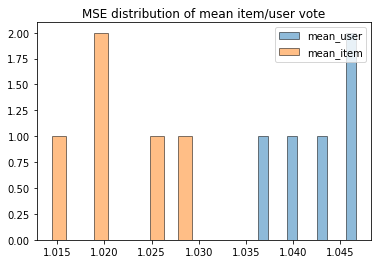

In [ ]:
import matplotlib.pyplot as plt

plt.hist(RMSE_mean_user_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_user')
plt.hist(RMSE_mean_item_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_item')
plt.legend(loc='upper right')
plt.title("MSE distribution of mean item/user vote")
plt.show()

In [ ]:
# p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest = t_test(mean_user = RMSE_mean_user_cv, mean_item = RMSE_mean_item_cv, verbose = True)

In [ ]:
_, p_ttest = sp.ttest_ind(RMSE_mean_user_cv, RMSE_mean_item_cv)
print("p_value", p_ttest)

p_value 0.00025595659089130453


On a p_value < 5%, donc l'hypothése nulle est rejetée et les résultats RMSE pour le vote moyen item sont bien différents en moyenne du vote moyen utilisateuur. En l'occurence, ici le vote moyen par item offre de meilleur résultats en moyenne que le vote par utilisateur.

Cependant on ne peut pas conclure réellement que les moyennes des deux distributions de RMSE sont différentes car on n'a pas vérifier les tests d'hypothéses du à un manque de points. Essayons donc avec 10 replis :

#### K = 10 (10 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 10
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask_to_split,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=10)

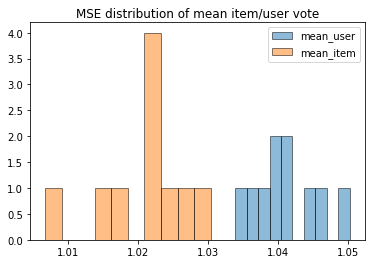

In [ ]:
import matplotlib.pyplot as plt

plt.hist(RMSE_mean_user_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_user')
plt.hist(RMSE_mean_item_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_item')
plt.legend(loc='upper right')
plt.title("MSE distribution of mean item/user vote")
plt.show()

In [ ]:
p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest = t_test(mean_user = RMSE_mean_user_cv, mean_item = RMSE_mean_item_cv, verbose = True)

p_value:	4.0340910502806995e-07
p_value mean_user normality:	0.8880545792848686
p_value mean_item normality:	0.1309685494580078
p_value Variance test:	0.7094297482796815


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Pour un repli de 10:

- p_ttest : <0.05 (l'hypothse sur l'égalité des moyennnes est rejeté) -> ***L'hypothése nulle est rejeté***
- p_value "mean user vote" normality: >0.05 (l'hypothèse sur la normalité est accepté) -> ***condition respectée***
- p_value "mean_item" normality :	 > 0.05 (l'hypothèse sur la normalité est accepté) -> ***condition respectée***
- Variance test: >0.05 (l'hypothèse sur l'égalité des variances est accepté) -> ***condition respectée***

Donc, les hypothèses sur l'égalité des variances et sur la normalité pour mean user vote sont respectées. De plus on a l'hypothése nulle qui est rejeté.

Cepednant, même avec toutes ces conditionns respectées, 10 points par distributions n'est pas suffisant pour conclure quoique ce soit. Les résultats sont sensibles à la seed choisie. Il nous faudrait beaucoup plus de points (au moins 30) que l'on pourrait simuler en faisant un "repeated k_fold", c'est a dire réiterer plusieurs fois la cross validation pour des seeds aléatoires différents.